In [1]:
import pandas as pd
from datetime import date

df = pd.read_csv("train.csv",index_col = 'tripid')
print(df.head)

<bound method NDFrame.head of            additional_fare  duration  meter_waiting  meter_waiting_fare  \
tripid                                                                    
189123628             10.5     834.0           56.0              0.0000   
189125358             10.5     791.0           47.0              0.0000   
189125719             10.5    1087.0           80.0              0.0000   
189127273             10.5     598.0          271.0             15.6638   
189128020              NaN       NaN            NaN                 NaN   
...                    ...       ...            ...                 ...   
213803193             10.5     838.0           93.0              5.4219   
213812756             10.5    2151.0          428.0              0.0000   
213813930             10.5     263.0            9.0              0.0000   
213815405             10.5     858.0          115.0              0.0000   
213817296             10.5     262.0           21.0              1.224

In [2]:
df.shape


(17176, 13)

In [3]:
df.describe()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare
count,16974.000000,16974.000000,16974.000000,16974.000000,16974.000000,17176.000000,17176.000000,17176.000000,17176.000000,17039.000000
mean,13.719651,1702.858077,629.074231,32.057666,112.466832,6.965499,79.998389,6.968587,79.997534,312.655466
std,98.975052,8120.160818,8063.260669,465.483573,442.054812,0.210760,0.243384,0.378669,0.359648,605.300565
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.937600,79.819100,5.941860,45.307700,0.000000
25%,10.500000,548.000000,33.000000,0.000000,26.000000,6.865077,79.870400,6.865625,79.870100,125.515000
50%,10.500000,1009.500000,123.000000,0.116600,73.000000,6.914105,79.898600,6.916160,79.899100,211.180000
75%,10.500000,1803.000000,351.000000,14.341800,144.000000,7.043057,79.956600,7.047195,79.960225,366.465000
max,12795.030000,453872.000000,453650.000000,26198.601400,51288.000000,8.051010,81.009600,48.132000,81.009700,26945.990000


In [4]:
print(df.isnull().sum())

additional_fare              202
duration                     202
meter_waiting                202
meter_waiting_fare           202
meter_waiting_till_pickup    202
pickup_time                    0
drop_time                      0
pick_lat                       0
pick_lon                       0
drop_lat                       0
drop_lon                       0
fare                         137
label                          0
dtype: int64


In [5]:
df = df.dropna()
df.shape

(16968, 13)

In [6]:
print(df.isnull().sum())

additional_fare              0
duration                     0
meter_waiting                0
meter_waiting_fare           0
meter_waiting_till_pickup    0
pickup_time                  0
drop_time                    0
pick_lat                     0
pick_lon                     0
drop_lat                     0
drop_lon                     0
fare                         0
label                        0
dtype: int64


In [7]:
df['Pickyear']  = pd.DatetimeIndex(df['pickup_time']).year
df['Pickmonth']  = pd.DatetimeIndex(df['pickup_time']).month
df['Pickday']  = pd.DatetimeIndex(df['pickup_time']).day
df['Pickhour'] = pd.DatetimeIndex(df['pickup_time']).hour


df['Dropyear']  = pd.DatetimeIndex(df['drop_time']).year
df['Dropmonth']  = pd.DatetimeIndex(df['drop_time']).month
df['Dropday']  = pd.DatetimeIndex(df['drop_time']).day
df['Drophour'] = pd.DatetimeIndex(df['drop_time']).hour


In [8]:
df = df.drop(["pickup_time"],axis = 1)
df = df.drop(["drop_time"],axis = 1)
df


,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,Pickyear,Pickmonth,Pickday,Pickhour,Dropyear,Dropmonth,Dropday,Drophour
tripid,,,,,,,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.0000,64.0,6.86252,79.8993,6.90330,79.8783,270.32,correct,2019,11,1,0,2019,11,1,0
189125358,10.5,791.0,47.0,0.0000,134.0,6.88589,79.8984,6.91373,79.8923,197.85,correct,2019,11,1,0,2019,11,1,1
189125719,10.5,1087.0,80.0,0.0000,61.0,6.90839,79.8651,6.93669,79.9146,301.64,correct,2019,11,1,1,2019,11,1,1
189127273,10.5,598.0,271.0,15.6638,68.0,6.92570,79.8895,6.92748,79.8971,82.30,correct,2019,11,1,2,2019,11,1,2
189129552,10.5,3407.0,182.0,0.0000,112.0,7.13402,79.8969,6.91865,79.8649,1065.02,correct,2019,11,1,5,2019,11,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213803193,10.5,838.0,93.0,5.4219,451.0,7.29073,80.6367,7.28891,80.6557,198.26,correct,2020,1,31,22,2020,1,31,22
213812756,10.5,2151.0,428.0,0.0000,39.0,6.90569,79.8516,6.95089,79.9389,581.23,correct,2020,1,31,23,2020,1,31,23
213813930,10.5,263.0,9.0,0.0000,110.0,7.09210,79.9000,7.10135,79.9017,76.20,correct,2020,1,31,23,2020,1,31,23


In [9]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

################ data encoding ####################

##### for training data set ###########
categorical_features = df.dtypes==object
# filter categorical columns and turn it into a list
non_numeric_features = df.columns[categorical_features].tolist()
print(non_numeric_features)

le = LabelEncoder()
df[non_numeric_features] = df[non_numeric_features].apply(lambda col: le.fit_transform(col))
print(df.shape)


['label']
(16968, 19)


In [10]:
Y = df['label']
X = df[['additional_fare','duration','meter_waiting','meter_waiting_fare','meter_waiting_till_pickup','pick_lat','pick_lon','drop_lat','drop_lon','fare','Pickyear','Pickmonth','Pickday','Pickhour','Dropyear','Dropmonth','Dropday','Drophour']]
print(Y.shape)
print(X.shape)

(16968,)
(16968, 18)


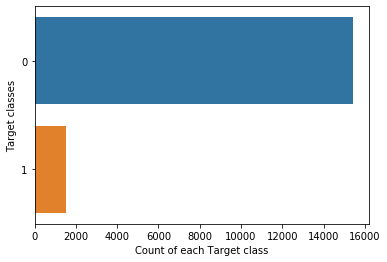

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(y=Y ,data=X)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [12]:
################ data normalization ####################

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

scaler.fit(X)
X_norm = scaler.transform(X)
print(X_norm.shape)




(16968, 18)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.3)

print(X_train.shape,X_test.shape )
print(Y_train.shape, Y_test.shape)

(11877, 18) (5091, 18)
(11877,) (5091,)


In [14]:
# sequential model to initialise our ann and dense module to build the layers
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [15]:
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 18))


# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the third hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train,Y_train, batch_size = 10, epochs = 100,verbose = 0)

score, acc = classifier.evaluate(X_train, Y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(X_test, Y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








11877/11877 [==============================] - 1s 71us/step
Train score: 0.2732855903273772
Train accuracy: 0.9126883818563853
********************
5091/5091 [==============================] - 0s 67us/step
Test score: 0.2629086764076034
Test accuracy: 0.9141622389306537


In [39]:
#############  check the model using test.csv ##############

df_test = pd.read_csv("test.csv")

print(df_test.head)
print(df_test.shape)

<bound method NDFrame.head of          tripid  additional_fare  duration  meter_waiting  meter_waiting_fare  \
0     213284604             10.5       924             42             2.44860   
1     213286352             10.5      4249             20             0.00000   
2     213293973             10.5      1552            255             2.65880   
3     213294622             10.5       462             16             0.00000   
4     213298687             10.5       814            392            12.36920   
...         ...              ...       ...            ...                 ...   
8571  222856243             10.5      1723            429            24.83332   
8572  222857785             10.5      1378             80             0.00000   
8573  222858416             10.5       418             56             3.28440   
8574  222858691             10.5      1604            548            31.67440   
8575  222860703             10.5      1698            691            32.88820  

In [40]:
df_test.describe()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare
count,8.576000e+03,8576.000000,8576.000000,8576.000000,8576.000000,8576.000000,8576.000000,8576.000000,8576.000000,8576.000000,8576.000000
mean,2.180067e+08,11.088095,1541.590485,508.502099,24.671655,119.863106,6.969246,80.008728,6.970008,80.010145,293.278057
std,2.789252e+06,5.359602,5952.458574,5784.005855,333.515641,793.233190,0.217809,0.251873,0.218826,0.252229,436.730282
min,2.132846e+08,0.000000,0.000000,0.000000,0.000000,0.000000,5.943130,79.817700,5.936600,79.818000,0.000000
25%,2.156247e+08,10.500000,540.000000,30.000000,0.000000,26.000000,6.864810,79.871600,6.864950,79.871300,126.077500
50%,2.179006e+08,10.500000,982.500000,116.000000,0.000000,72.000000,6.913605,79.900500,6.915460,79.902250,203.950000
75%,2.203904e+08,10.500000,1723.000000,336.250000,11.744200,138.000000,7.068875,79.963225,7.073505,79.967825,344.075000
max,2.228607e+08,160.500000,447230.000000,446934.000000,25760.361800,55571.000000,8.425010,80.776400,8.421730,80.805500,26844.330000


In [41]:
print(df_test.isnull().sum())
df_test = df_test.dropna()
df_test.shape


tripid                       0
additional_fare              0
duration                     0
meter_waiting                0
meter_waiting_fare           0
meter_waiting_till_pickup    0
pickup_time                  0
drop_time                    0
pick_lat                     0
pick_lon                     0
drop_lat                     0
drop_lon                     0
fare                         0
dtype: int64


(8576, 13)

In [42]:
df_test['Pickyear']  = pd.DatetimeIndex(df_test['pickup_time']).year
df_test['Pickmonth']  = pd.DatetimeIndex(df_test['pickup_time']).month
df_test['Pickday']  = pd.DatetimeIndex(df_test['pickup_time']).day
df_test['Pickhour'] = pd.DatetimeIndex(df_test['pickup_time']).hour


df_test['Dropyear']  = pd.DatetimeIndex(df_test['drop_time']).year
df_test['Dropmonth']  = pd.DatetimeIndex(df_test['drop_time']).month
df_test['Dropday']  = pd.DatetimeIndex(df_test['drop_time']).day
df_test['Drophour'] = pd.DatetimeIndex(df_test['drop_time']).hour


In [43]:
df_test = df_test.drop(["pickup_time"],axis = 1)
df_test = df_test.drop(["drop_time"],axis = 1)
df_test


,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,Pickyear,Pickmonth,Pickday,Pickhour,Dropyear,Dropmonth,Dropday,Drophour
0,213284604,10.5,924,42,2.44860,148,6.83454,79.8750,6.77490,79.8840,289.27,2020,2,1,0,2020,2,1,0
1,213286352,10.5,4249,20,0.00000,91,6.91168,79.8723,6.55091,79.9706,1912.70,2020,2,1,1,2020,2,1,2
2,213293973,10.5,1552,255,2.65880,23,6.92145,79.8478,6.90539,79.8989,394.00,2020,2,1,5,2020,2,1,5
3,213294622,10.5,462,16,0.00000,198,6.77433,79.9416,6.80401,79.9407,154.32,2020,2,1,5,2020,2,1,5
4,213298687,10.5,814,392,12.36920,69,6.97968,79.9130,6.98875,79.8914,147.47,2020,2,1,7,2020,2,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8571,222856243,10.5,1723,429,24.83332,3,6.85103,79.9567,6.85588,79.9214,388.48,2020,3,16,21,2020,3,16,21
8572,222857785,10.5,1378,80,0.00000,125,6.91293,79.9656,6.92112,79.8980,379.85,2020,3,16,21,2020,3,16,22
8573,222858416,10.5,418,56,3.28440,93,6.85718,79.9081,6.83868,79.9083,112.79,2020,3,16,22,2020,3,16,22
8574,222858691,10.5,1604,548,31.67440,17,6.91289,79.8846,6.93159,79.9145,248.46,2020,3,16,22,2020,3,16,22


In [44]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

################ data encoding ####################

##### for training data set ###########
categorical_features = df_test.dtypes==object
# filter categorical columns and turn it into a list
non_numeric_features = df_test.columns[categorical_features].tolist()
print(non_numeric_features)


[]


In [45]:
x_test = df_test[['additional_fare','duration','meter_waiting','meter_waiting_fare','meter_waiting_till_pickup','pick_lat','pick_lon','drop_lat','drop_lon','fare','Pickyear','Pickmonth','Pickday','Pickhour','Dropyear','Dropmonth','Dropday','Drophour']]
print(x_test.shape)

(8576, 18)


In [46]:
################ data normalization ####################

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

scaler.fit(x_test)
x_test_norm = scaler.transform(x_test)
print(x_test_norm.shape)



(8576, 18)


In [63]:
# Predicting the Test set results
y_pred = classifier.predict(x_test_norm)
y_pred = (y_pred > 0.5)




In [64]:
import numpy as np
print(y_pred)

df_y_pred['label'] = pd.DataFrame(data=y_pred)

[[ True]
 [ True]
 [ True]
 ...
 [ True]
 [ True]
 [ True]]


In [65]:
df_y_pred["label"] = df_y_pred["label"].astype(int)
print(df_y_pred)

         0  label     tripid
0     True      1  213284604
1     True      1  213286352
2     True      1  213293973
3     True      1  213294622
4     True      1  213298687
...    ...    ...        ...
8571  True      1  222856243
8572  True      1  222857785
8573  True      1  222858416
8574  True      1  222858691
8575  True      1  222860703

[8576 rows x 3 columns]


In [68]:
df_y_pred['tripid' ] = df_test['tripid']
print(df_y_pred)

df_y_pred.to_csv("submission.csv")

         0  label     tripid
0     True      1  213284604
1     True      1  213286352
2     True      1  213293973
3     True      1  213294622
4     True      1  213298687
...    ...    ...        ...
8571  True      1  222856243
8572  True      1  222857785
8573  True      1  222858416
8574  True      1  222858691
8575  True      1  222860703

[8576 rows x 3 columns]
